In [47]:
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt


import re
import copy
from langdetect import detect
from textblob import TextBlob

%matplotlib inline

In [48]:
from IPython.display import display, HTML

In [49]:
calendar = pd.read_csv("data/calendar.csv")

In [50]:
listings = pd.read_csv("data/listings.csv")

In [51]:
reviews = pd.read_csv("data/reviews.csv")

In [52]:
# explore dtypes, shape, null count, hist(skewness)

In [53]:
calendar.head()

,listing_id,date,available,price
0,241032,2016-01-04,t,$85.00
1,241032,2016-01-05,t,$85.00
2,241032,2016-01-06,f,NaN
3,241032,2016-01-07,f,NaN
4,241032,2016-01-08,f,NaN


In [54]:
calendar.shape

(1393570, 4)

In [55]:
calendar.isnull().sum()

listing_id         0
date               0
available          0
price         459028
dtype: int64

In [56]:
calendar['date']=pd.to_datetime(calendar.date)
# dt.weekday.head()

In [57]:
calendar['weekday'] =calendar['date'].dt.weekday

In [58]:
# display(HTML(calendar[['weekday','date'].to_html()))

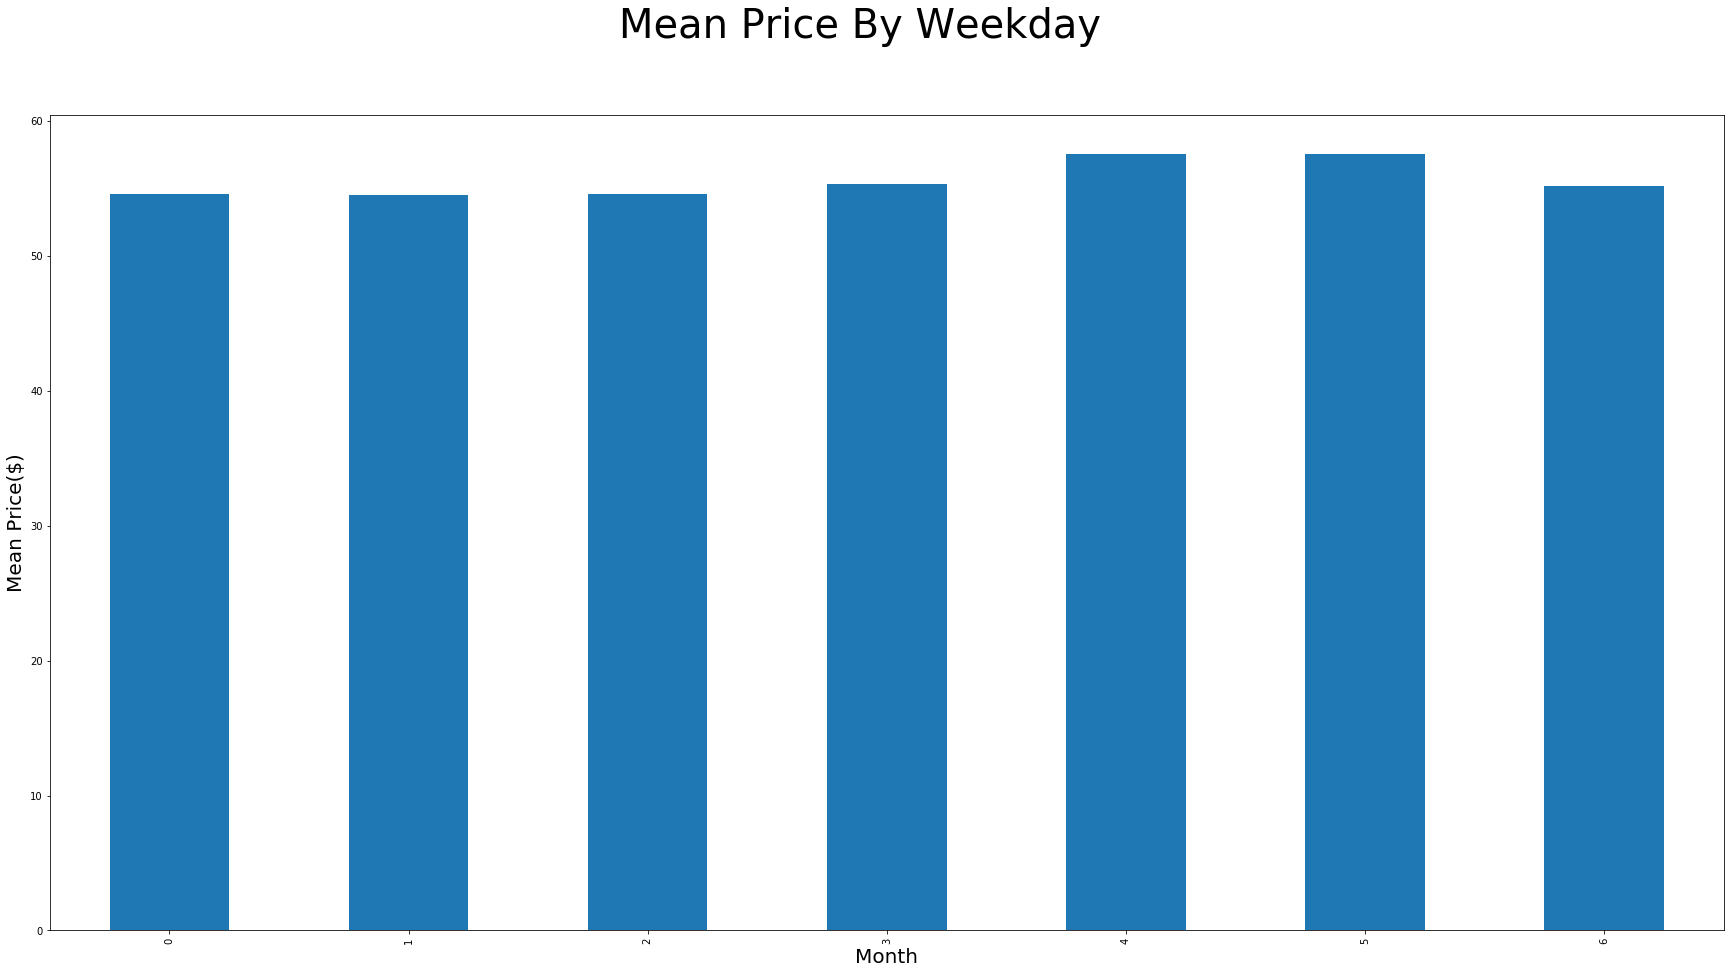

In [59]:
calendar['price']=calendar.price.fillna('-1').apply(lambda x: re.sub('[\$|\.00|\,]','', x)).astype('int')

# calendar.groupby(['weekday']).price.mean().reset_index()
# 5 is saturday
fig = plt.figure(figsize=(30,15))
ax = fig.gca()


calendar.groupby(['weekday']).price.mean().plot.bar()
t =fig.suptitle('Mean Price By Weekday', fontsize=40)
a=ax.set_xlabel('Month',fontsize=20)
b =ax.set_ylabel('Mean Price($)',fontsize=20)
# plt.savefig('mean_price_by_Weekday.png')

In [60]:
calendar['month'] =calendar['date'].dt.month
calendar.groupby(['month']).price.mean().sort_values().reset_index()


,month,price
0,1,42.236686
1,2,50.342868
2,4,55.120831
3,10,55.499214
4,11,56.034102
5,3,56.329441
6,9,56.799328
7,5,57.433498
8,12,58.235573
9,8,58.438407


In [61]:
calendar = calendar.loc[calendar.price!=-1,:]

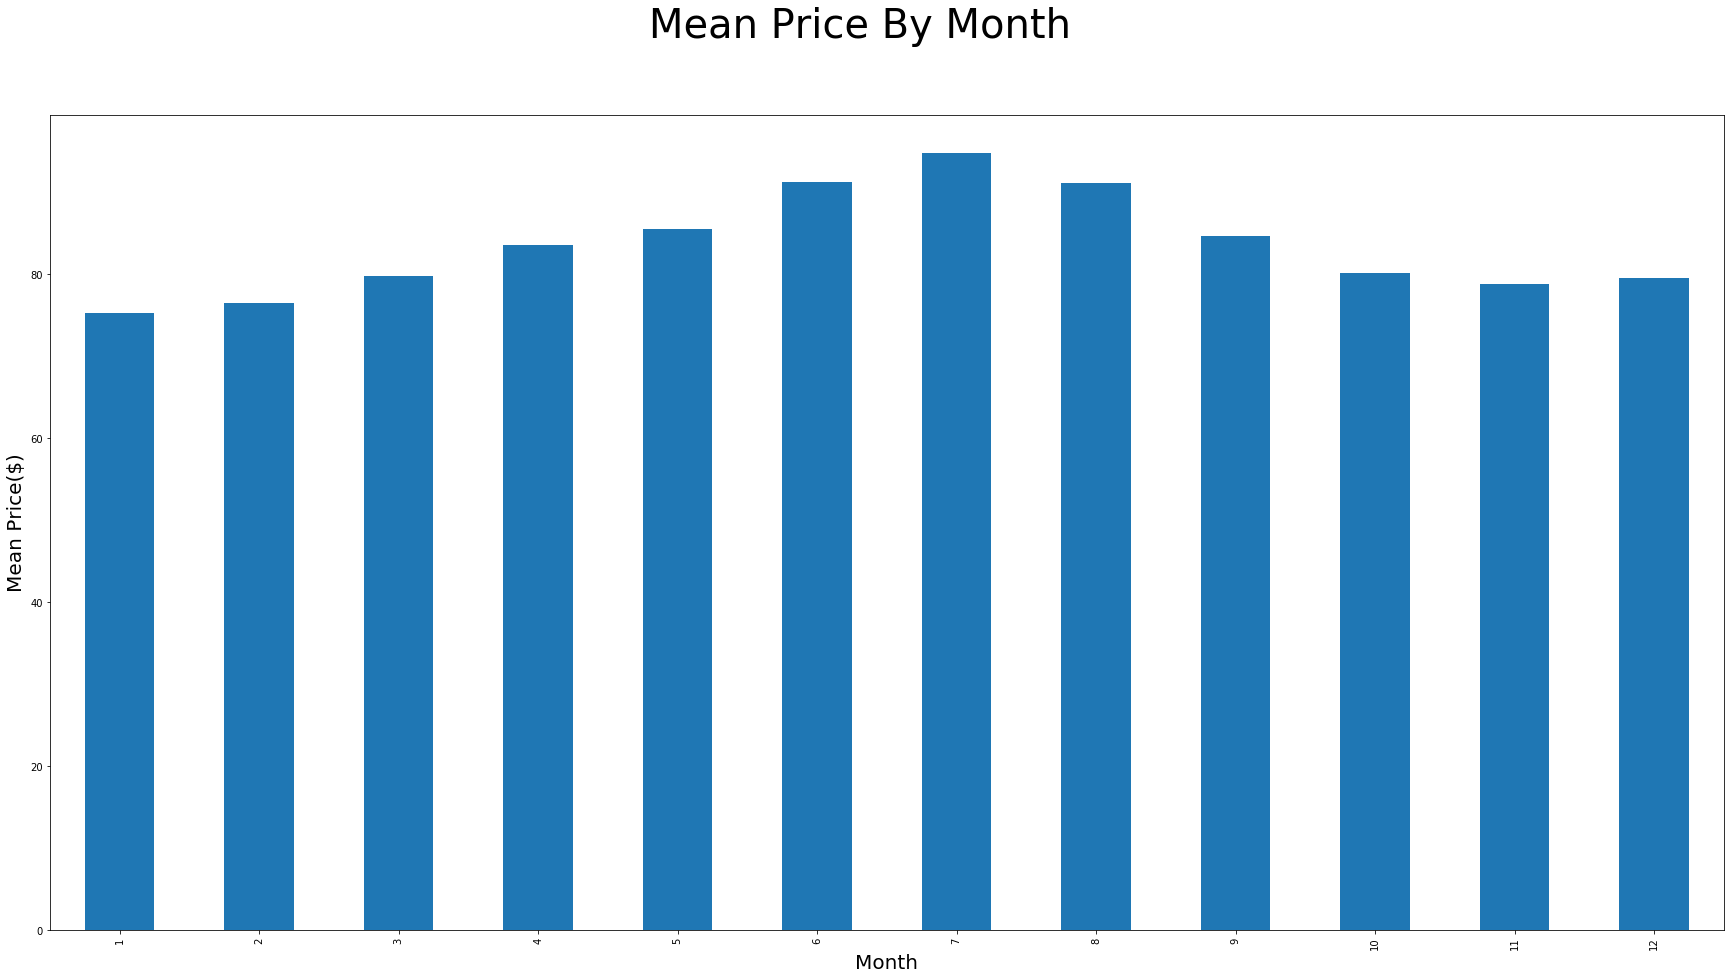

In [63]:
fig = plt.figure(figsize=(30,15))
ax = fig.gca()


calendar.groupby(['month']).price.mean().plot.bar()
t =fig.suptitle('Mean Price By Month', fontsize=40)
a=ax.set_xlabel('Month',fontsize=20)
b =ax.set_ylabel('Mean Price($)',fontsize=20)
# plt.savefig('mean_price_by_month.png')

In [64]:
listings.head()

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,review_scores_value,requires_license,license,jurisdiction_names,instant_bookable,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,reviews_per_month
0,241032,https://www.airbnb.com/rooms/241032,20160104002432,2016-01-04,Stylish Queen Anne Apartment,NaN,Make your self at home in this charming one-be...,Make your self at home in this charming one-be...,none,NaN,...,10.0,f,NaN,WASHINGTON,f,moderate,f,f,2,4.07
1,953595,https://www.airbnb.com/rooms/953595,20160104002432,2016-01-04,Bright & Airy Queen Anne Apartment,Chemically sensitive? We've removed the irrita...,"Beautiful, hypoallergenic apartment in an extr...",Chemically sensitive? We've removed the irrita...,none,"Queen Anne is a wonderful, truly functional vi...",...,10.0,f,NaN,WASHINGTON,f,strict,t,t,6,1.48
2,3308979,https://www.airbnb.com/rooms/3308979,20160104002432,2016-01-04,New Modern House-Amazing water view,New modern house built in 2013. Spectacular s...,"Our house is modern, light and fresh with a wa...",New modern house built in 2013. Spectacular s...,none,Upper Queen Anne is a charming neighborhood fu...,...,10.0,f,NaN,WASHINGTON,f,strict,f,f,2,1.15
3,7421966,https://www.airbnb.com/rooms/7421966,20160104002432,2016-01-04,Queen Anne Chateau,A charming apartment that sits atop Queen Anne...,NaN,A charming apartment that sits atop Queen Anne...,none,NaN,...,NaN,f,NaN,WASHINGTON,f,flexible,f,f,1,NaN
4,278830,https://www.airbnb.com/rooms/278830,20160104002432,2016-01-04,Charming craftsman 3 bdm house,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,Cozy family craftman house in beautiful neighb...,none,We are in the beautiful neighborhood of Queen ...,...,9.0,f,NaN,WASHINGTON,f,strict,f,f,1,0.89


In [65]:
listings.columns.tolist()

['id',
 'listing_url',
 'scrape_id',
 'last_scraped',
 'name',
 'summary',
 'space',
 'description',
 'experiences_offered',
 'neighborhood_overview',
 'notes',
 'transit',
 'thumbnail_url',
 'medium_url',
 'picture_url',
 'xl_picture_url',
 'host_id',
 'host_url',
 'host_name',
 'host_since',
 'host_location',
 'host_about',
 'host_response_time',
 'host_response_rate',
 'host_acceptance_rate',
 'host_is_superhost',
 'host_thumbnail_url',
 'host_picture_url',
 'host_neighbourhood',
 'host_listings_count',
 'host_total_listings_count',
 'host_verifications',
 'host_has_profile_pic',
 'host_identity_verified',
 'street',
 'neighbourhood',
 'neighbourhood_cleansed',
 'neighbourhood_group_cleansed',
 'city',
 'state',
 'zipcode',
 'market',
 'smart_location',
 'country_code',
 'country',
 'latitude',
 'longitude',
 'is_location_exact',
 'property_type',
 'room_type',
 'accommodates',
 'bathrooms',
 'bedrooms',
 'beds',
 'bed_type',
 'amenities',
 'square_feet',
 'price',
 'weekly_price',


In [66]:
listings.shape

(3818, 92)

In [67]:
listings.isnull().sum()

id                                     0
listing_url                            0
scrape_id                              0
last_scraped                           0
name                                   0
summary                              177
space                                569
description                            0
experiences_offered                    0
neighborhood_overview               1032
notes                               1606
transit                              934
thumbnail_url                        320
medium_url                           320
picture_url                            0
xl_picture_url                       320
host_id                                0
host_url                               0
host_name                              2
host_since                             2
host_location                          8
host_about                           859
host_response_time                   523
host_response_rate                   523
host_acceptance_

In [32]:
reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,7202016,38917982,2015-07-19,28943674,Bianca,Cute and cozy place. Perfect location to every...
1,7202016,39087409,2015-07-20,32440555,Frank,Kelly has a great room in a very central locat...
2,7202016,39820030,2015-07-26,37722850,Ian,"Very spacious apartment, and in a great neighb..."
3,7202016,40813543,2015-08-02,33671805,George,Close to Seattle Center and all it has to offe...
4,7202016,41986501,2015-08-10,34959538,Ming,Kelly was a great host and very accommodating ...


In [33]:
reviews.shape

(84849, 6)

In [34]:
reviews.isnull().sum()

listing_id        0
id                0
date              0
reviewer_id       0
reviewer_name     0
comments         18
dtype: int64

In [17]:
reviews.dropna(inplace=True)

In [18]:
reviews['comments'] = reviews['comments'].apply(lambda val : re.sub('[^a-zA-Z0-9]',' ', val.lower(), flags=re.IGNORECASE))

In [19]:
def detect_lang(val):
    try:
        return detect(val)
    except:
        return ''
reviews['lang'] = reviews['comments'].apply(lambda val: detect_lang(val))

In [20]:
reviews = reviews.loc[reviews.lang!='',:]

In [21]:
reviews.shape

(84679, 7)

In [22]:
reviews[reviews.lang!='en'].shape

(916, 7)

In [23]:
# Please uncomment to generate the files yourself
# reviews[reviews.lang=='de'].comments.to_csv('de_comments.csv')

In [24]:
# Please uncomment to generate the files yourself
# reviews[reviews.lang=='fr'].comments.to_csv('fr_comments.csv')

In [25]:
reviews = reviews.loc[reviews.lang=='en',:]

In [26]:
# Please uncomment to generate the files yourself
# reviews.loc[reviews.lang!='en','comments'].head()

In [27]:
reviews['polarity'] = reviews['comments'].apply(lambda val :  TextBlob(val).sentiment.polarity )                                                                                                   
                                                                                                                              

In [28]:
reviews.to_csv('data/reviews_with_polarity.csv')

In [29]:
reviews.shape

(83763, 8)

**Read previously saved reviews**

In [35]:
calendar = pd.read_csv("data/calendar.csv")

In [36]:
listings = pd.read_csv("data/listings.csv")

In [37]:
reviews = pd.read_csv("data/reviews_with_polarity.csv")

In [38]:
# get review average for each listing
reviews_ext = reviews.merge(listings, left_on='listing_id', right_on='id')

In [39]:
reviews_ext['rank'] = reviews_ext.price.rank(ascending=False)

In [40]:
reviews_ext['rank'].describe()

count    83763.0000
mean     41882.0000
std      24173.1669
min         27.0000
25%      20396.0000
50%      42651.0000
75%      62673.0000
max      83763.0000
Name: rank, dtype: float64

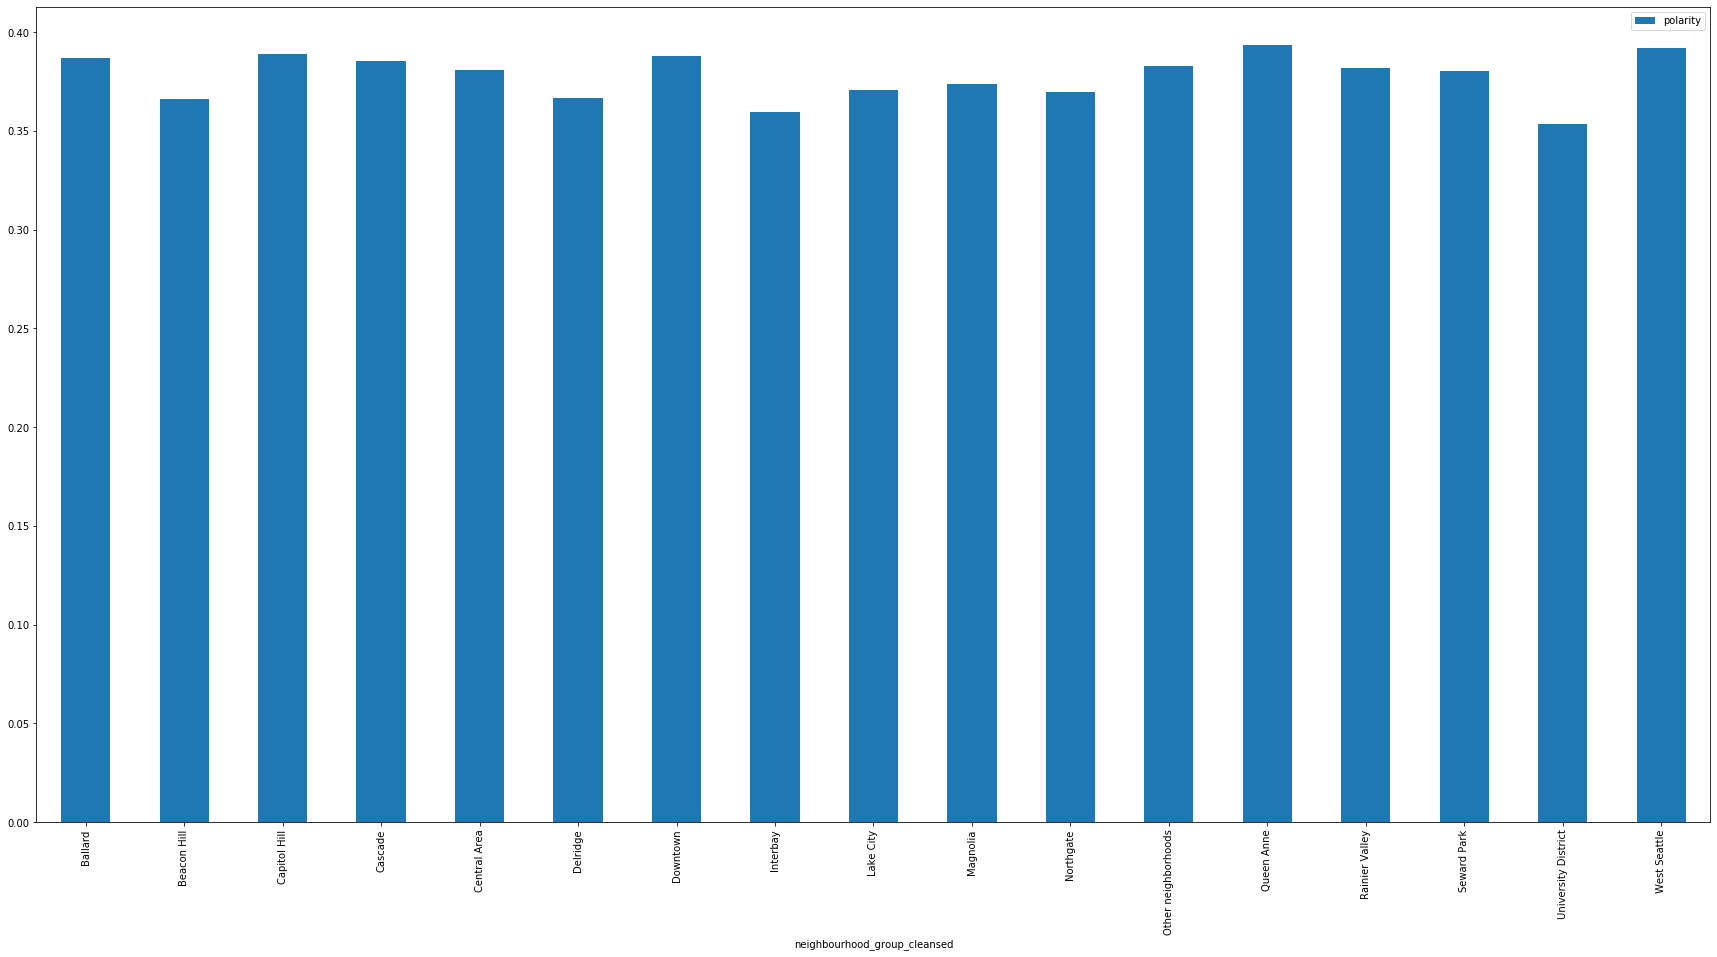

In [41]:
fig = plt.figure(figsize=(30,15))
ax = fig.gca()
reviews_ext.groupby(['neighbourhood_group_cleansed']).agg({'polarity':'mean'}).plot.bar(ax=ax)